In [1]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
import analysis.lib.purification.purify_ssro as pu_ssro;reload(pu_ssro)
%matplotlib inline

reloaded
reloaded
reloaded


In [ ]:
## easy plotting
reload(pu_ssro)
pu_ssro.plot_pos_neg_data(contains = '112407')

## Repump speed

In [ ]:
### to be written // imported from Qmemory

## average repump time Z

In [ ]:
reload(pu_ssro)
pu_ssro.average_repump_time(contains = '_X_C3',do_fit = True)



## average repump time XY

In [ ]:
reload(pu_ssro)

pu_ssro.average_repump_time(contains = 'Sweep_Repump_tim',do_fit = True, fit_x0 = 0.200)

## Number of repetitions

reloaded


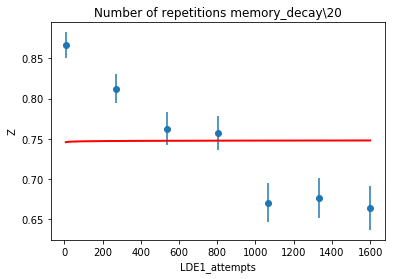

In [12]:
reload(pu_ssro)
folder = r"D:\measuring\data\memory_decay"
pu_ssro.number_of_repetitions(contains ='081052',do_fit = True,fixed=[0,2,5,6],is_z=False,x_only = False,folder=folder)
# pu_ssro.number_of_repetitions(contains ='223514',do_fit = True,fixed=[0,2,4,5,6],is_z=False,x_only = False)
# pu_ssro.number_of_repetitions(contains = '_Z',do_fit = True,fixed=[0,2,5,6])

## El to C swap

In [ ]:
reload(pu_ssro)
pu_ssro.el_to_c_swap(input_el=['X','Y','Z'])

In [ ]:
reload(pu_ssro)
pu_ssro.el_to_c_swap_success(input_el= ['X','mX','Y','mY','Z','mZ'])

## Calibrate LDE phase

In [ ]:
reload(pu_ssro)
# pu_ssro.calibrate_LDE_phase('030238',do_fit = True,fixed = [1],show_guess = False, freq = 20./360, phi0=180.0)
# pu_ssro.calibrate_LDE_phase('032906',do_fit = True,fixed = [1],show_guess = False, freq = 20./360, phi0=180.0)
pu_ssro.calibrate_LDE_phase('',do_fit = True,fixed = [1],show_guess = True, freq = 5./360, phi0=0.0)

# Calibrate sequence phase offset

In [ ]:
reload(pu_ssro)
pu_ssro.calibrate_phase_offset(contains='phase_offset',
                            do_fit = True,show_guess = True,
                            #older_than="20170627125400",
                           )

## Calibrate feedback phase

In [ ]:
reload(pu_ssro)
pu_ssro.calibrate_LDE_phase(contains = 'phase_compensation',do_fit = True,fixed = [1,4],show_guess = True, freq = -70/360.,decay = 50e3)

In [ ]:
print 360/(360.-79.575) # 2.299
print 360/17.625 # 2.298
360/16.339 # 2.3

# Apply feedback phase analysis

In [ ]:
phase_per_sequence_repetition = (-2.35+(25-6.6)-0.5+0.24)
delta = 40
phase_to_compensate = (305+phase_per_sequence_repetition*1)%360
print phase_to_compensate
phase_per_compensation_repetition = 17.557

phase_acquired = 0
mindev = 361

for x in range(80):
    phase_acquired += phase_per_compensation_repetition
    if phase_acquired > 360:
        phase_acquired -= 360
    
    dev = abs(phase_to_compensate - phase_acquired)
    #print x,dev
    if dev < mindev:
        mindev = dev
        minx = x+1
print mindev
print minx

In [ ]:
from analysis.scripts.mbi import mbi_data_general_fits as fits; reload(fits)

Result = fits.exp_sin(timestamp=  None, contains = '185144',
                      offset=[0.5], amplitude = [0.485], center = [0], decay_constant = [350], 
                      exp_power = [2],
                      frequency = [6./360], phase =[0.], 
                      fixed = [0,2,4],
                      ylim = None,
                      plot_fit = True,do_print = True, show_guess = False)
phase_per_point = 360*Result[0]['params_dict']['f']
phase_error =  360*Result[0]['error_dict']['f']
offset = Result[0]['params_dict']['phi']
offset_error = Result[0]['error_dict']['phi']

print phase_per_point,phase_error
print offset, offset_error

# Check phase offset after LDE 2

In [ ]:
reload(pu_ssro)

tomo = 'Z'
Result = pu_ssro.calibrate_LDE_phase(contains = 'phase_offset_after_LDE',do_fit = True,ret = True, 
                                     tomo_basis = tomo,fixed = [0,1,4],show_guess = False, phi0=160,decay = 1e5,freq = 1./360)

offset = Result['params_dict']['phi']
offset_error = Result['error_dict']['phi']

print 'the offset phase changes by (error): ',360 - offset, offset_error

# Full sequence local

In [ ]:
reload(pu_ssro)
pu_ssro.number_of_repetitions(contains = 'full',do_fit = False,fixed=[0,2,5,6],x_only = True)

# Classical correlations

In [ ]:
reload(pu_ssro)
pu_ssro.calibrate_LDE_phase(contains = '_classical_correlations_onC13_Z',do_fit = False,ret = False, 
 tomo_basis = '',show_guess = False,post_select_e_outcome = True)


# Delay feedback detuned

In [ ]:
reload(pu_ssro)
pu_ssro.calibrate_LDE_phase(contains = 'phase_fb_delayline',
                            #older_than = "20170712153500",
                            do_fit = True,fixed = [1],show_guess = True, plot_fit=False, 
                            freq = 10./360.,decay = 200,phi0=0.0, 
                            offset=0.0, A0 = 0.6, tomo_basis='XX'
                           )

# Delay feedback state preservation

In [ ]:
reload(pu_ssro)
pu_ssro.calibrate_LDE_phase(contains = '',
                            # older_than = "20170720170600",
                            do_fit = True,fixed = [0,1,3],show_guess = True, plot_fit=False, 
                            freq = 0/360.,
                            decay = 50,
                            phi0=0.0, tomo_basis='X')

# Old feedback

In [ ]:
reload(pu_ssro)
pu_ssro.calibrate_LDE_phase(contains = 'ADwin_phase_compensation',
                            #older_than = "20170531174300",
                            do_fit = True,fixed = [1,4],show_guess = True, freq =6/360.,decay = 50e3)

In [ ]:
reload(pu_ssro)
pu_ssro.el_to_c_swap(contains='Swap_simple_el_init_to_C', input_el=['X','Y','Z'])

In [ ]:
def f_repump(tau, omega,N):
    return ((1+np.exp(-(tau*omega)**2/2))/2)**N

omega = 2*np.pi*76e3
tau = 0.220e-6
Ns = np.arange(0,400,1)
fig = plt.figure()
ax = plt.subplot()

plt.plot(Ns,f_repump(tau,omega,Ns),'.',label='Faraday formula 220 ns repump time')
p0,fitfunc,fitfunc_str = common.fit_exp_cos(0,1., 0., 300, 1, 0, 0)
fixed = [0,1,2,4,5,6]
fit_result = fit.fit1d(Ns,f_repump(tau,omega,Ns),None,p0=p0,fitfunc=fitfunc,do_print=True,fixed=fixed,ret=True)

if isinstance(fit_result, int):
    print "Fit failed!"
else: 
    plot.plot_fit1d(fit_result,np.linspace(Ns[0],Ns[-1],100),ax=ax,plot_data=False)
plt.xlabel('LDE attempts')
plt.legend()
plt.ylabel('Expectation value')